In [45]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
voronoi = sc.read_h5ad('../data/xenium/outs/final_adatas/adata_voronoi_binning_stats.h5ad')

In [133]:
voronoi

AnnData object with n_obs × n_vars = 103801 × 313
    obs: 'id', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'clusters', 'CellType', 'similarity', 'cell_id', 'realCellType'
    var: 'transcript_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'CellType_colors', 'clusters', 'hvg', 'log1p', 'neighbors', 'pca', 'realCellType_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [134]:
folder = '../data/xenium/outs/'

# Read the data
adata = sc.read_10x_h5(folder + 'cell_feature_matrix.h5')

# Load the cell type annotations
cell_type_df = pd.read_csv(folder + 'insitu_replicate_1_annotation.csv', index_col=0)

# Ensure index consistency and add 'cell_type' to adata
cell_type_df.index = cell_type_df.index.astype(str)
adata.obs['cell_type'] = cell_type_df['Cluster']

# Load additional metadata and add centroid coordinates to adata
cell_meta_df = pd.read_csv(folder + 'cells.csv', index_col=0)
cell_meta_df.index = cell_meta_df.index.astype(str)
adata.obs[['x_centroid', 'y_centroid']] = cell_meta_df[['x_centroid', 'y_centroid']]
adata.obs['cell_id'] = cell_meta_df.index

# Filter out unlabeled cells
adata = adata[adata.obs['cell_type'] != 'Unlabeled']




In [136]:
voronoi.obs['cell_id'] = voronoi.obs['cell_id'].astype(float)
voronoi.obs['cell_id'] = voronoi.obs['cell_id'].astype(int)

In [137]:
voronoi_obs_df = voronoi.obs
voronoi_df = voronoi_obs_df[['cell_id', 'CellType', 'realCellType']].copy()

In [138]:
voronoi_df

,cell_id,CellType,realCellType
0,142883,Endothelial,Stromal
1,141638,DCIS_2,DCIS_2
2,133378,Stromal,Stromal
3,141054,DCIS_2,DCIS_2
4,141241,Stromal,Stromal
...,...,...,...
107801,141635,DCIS_2,DCIS_2
107802,141055,DCIS_2,Myoepi_KRT15+
107803,134602,Stromal,Stromal
107804,145875,DCIS_2,DCIS_2


In [139]:
# Convert 'cell_id' in adata to string (if needed)
adata.obs['cell_id'] = adata.obs['cell_id'].astype(int)

/var/folders/fd/jw2fvp1178s0spb_1sy9f51h0000gn/T/ipykernel_47950/1795972567.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['cell_id'] = adata.obs['cell_id'].astype(int)


In [140]:
merged_df = adata.obs.merge(voronoi_df, on='cell_id', how='left')


In [142]:
merged_df = merged_df.rename(columns={
    'CellType': 'voronoi_cell_type',
    'realCellType': 'voronoi_cell_type_real'
})
merged_df

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN
...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1


In [143]:
adata.obs = merged_df

In [144]:
adata.obs

,cell_type,x_centroid,y_centroid,cell_id,voronoi_cell_type,voronoi_cell_type_real
0,DCIS_1,847.259912,326.191365,1,NaN,NaN
1,DCIS_1,826.341995,328.031830,2,NaN,NaN
2,Invasive_Tumor,824.228409,334.252643,4,NaN,NaN
3,DCIS_1,841.357538,332.242505,5,NaN,NaN
4,DCIS_1,828.726239,341.712347,8,NaN,NaN
...,...,...,...,...,...,...
159221,DCIS_2,7455.475342,5114.875415,167776,NaN,NaN
159222,DCIS_1,7483.727051,5111.477490,167777,NaN,NaN
159223,DCIS_2,7470.159424,5119.132056,167778,DCIS_2,DCIS_2
159224,DCIS_1,7477.737207,5128.712817,167779,DCIS_2,DCIS_1


In [145]:
adata.obs['voronoi_cell_type'] = adata.obs['voronoi_cell_type'].replace('nan', 'not_selected')

In [146]:
# Normalize and log-transform the data
sc.pp.normalize_total(adata, inplace=True, target_sum=1e4)
sc.pp.log1p(adata)

# Perform PCA, neighborhood graph, and UMAP
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

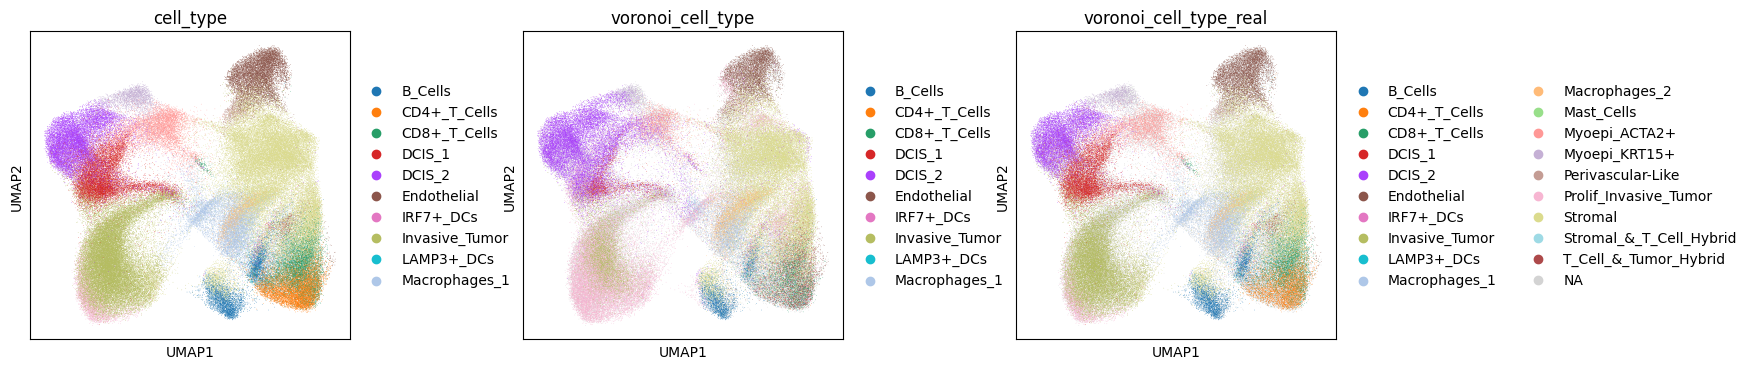

In [147]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["cell_type", 'voronoi_cell_type', 'voronoi_cell_type_real'], wspace=0.4)

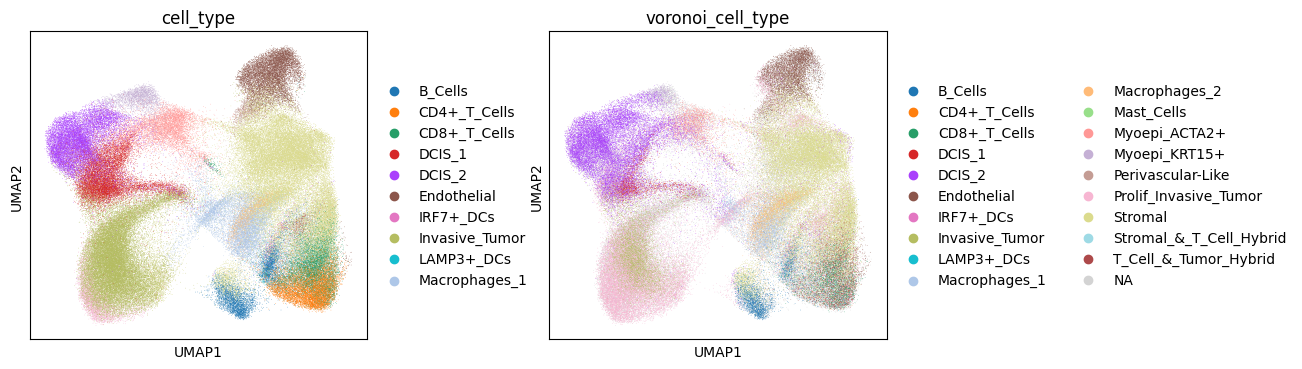

In [148]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["cell_type", 'voronoi_cell_type'], wspace=0.4)

In [165]:

# Filter the AnnData object to keep only the rows where 'voronoi_cell_type' is 'not_selected'
filtered_adata = adata[adata.obs['voronoi_cell_type'] == 'Prolif_Invasive_Tumor']


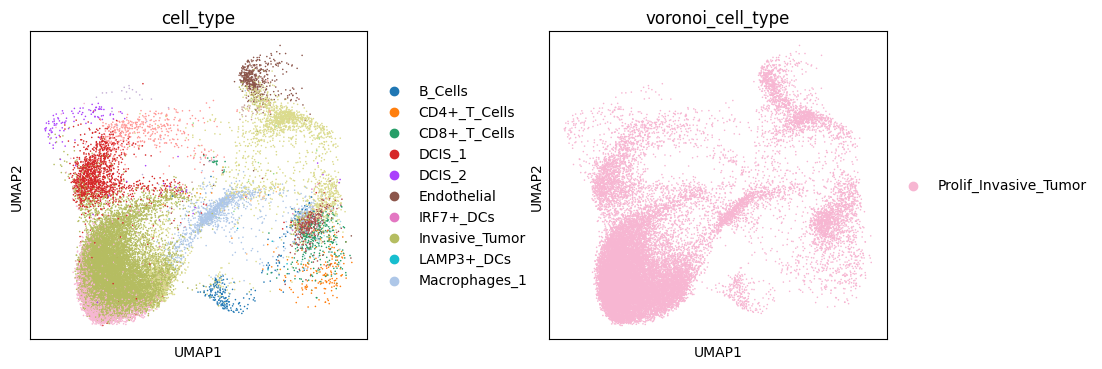

In [166]:
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(filtered_adata, color=["cell_type", 'voronoi_cell_type'], wspace=0.4)